In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.isnull().sum()#checking null values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [4]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [5]:
df.info()#checking datatype of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

df#converting object data into numerical

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
#Removing Duplicate entries
df.drop_duplicates(inplace=True)
df.shape
#so, there are not any duplicate entries.

(4177, 9)

In [9]:
X=df.drop(columns=['Rings'])
y=df['Rings']

C:\Users\91945\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91945\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91945\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91945\Anacond

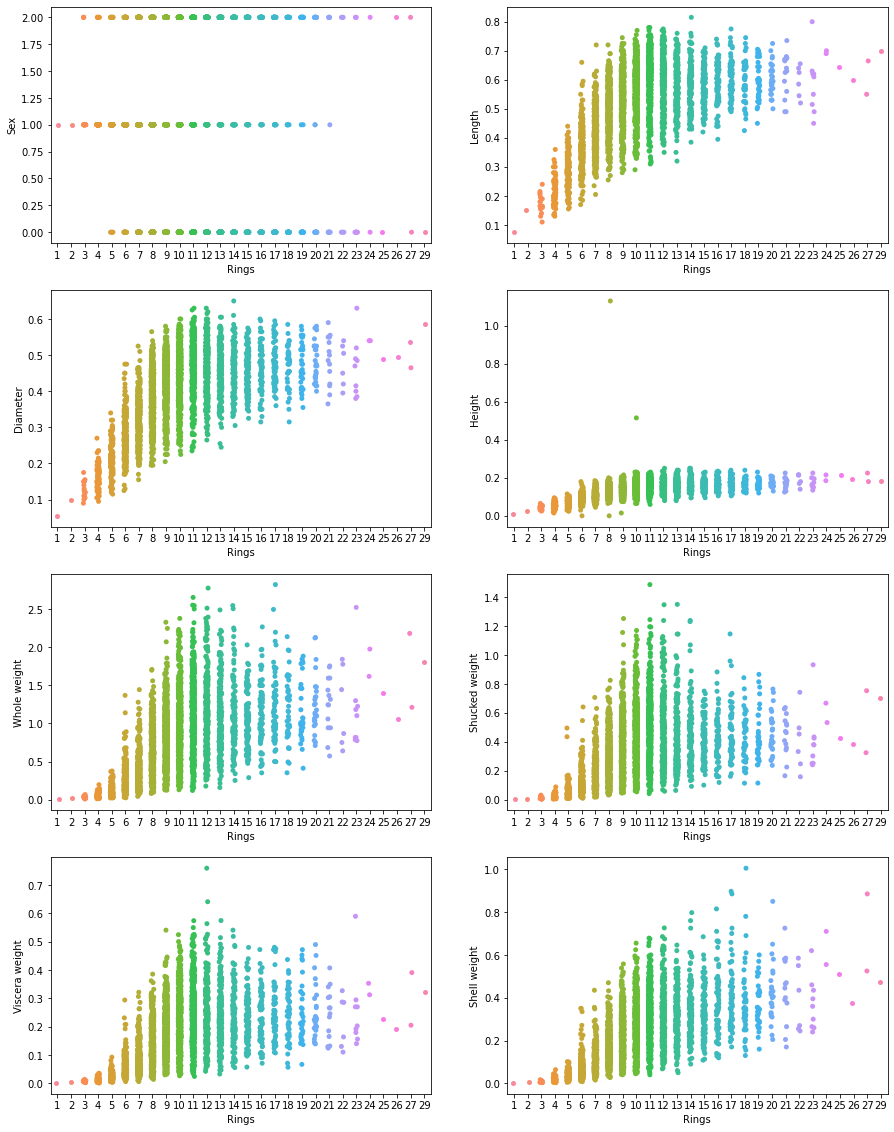

In [10]:
#visualizing data relation between feature and label
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.stripplot(y,X[column])
    
    plotnumber+=1
plt.show()

### Observation
Every feature is positivly related to label column.

In [11]:
#checking correlation of features and target using corrwith
df.drop('Rings',axis=1).corrwith(df['Rings'])

Sex              -0.034627
Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
dtype: float64

(9, 9)


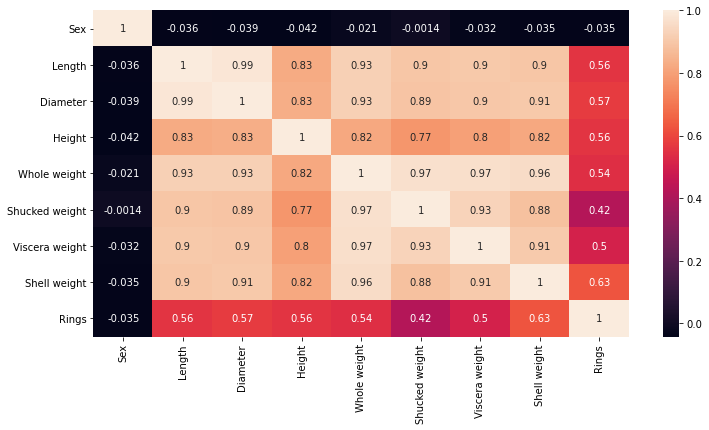

In [12]:
corr=df.corr()
print(corr.shape)
#visualising correlation using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)
plt.show()

### Observation
Viscera weight is highly correlated with shell width,shucked weight,whole weight,Diameter,Length.

shell weight is highly correlated with Viscera weight,shucked weight,whole weight,Diameter,Length.

shucked weight is highly correlated with shell weight,Viscera weight,Whole weight,Diameter,Length.

Whole weight is highly correlated with shell weight,Viscera weight,shucked weight,Diameter,Length.

Diameter is highly correlated with shell weight,viscera weight,shucked weight,whole weight, Length.

Length is highly correlated with Shell weight,Viscera weight,Shucked weight,whole weight,Diameter.

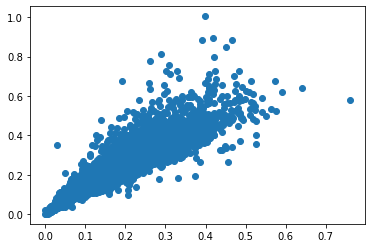

In [13]:
#Let's confirm it
plt.scatter(df['Viscera weight'],df['Shell weight'])
plt.show()
#both are positivly correlated

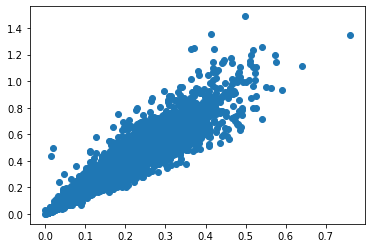

In [14]:
#Let's confirm it
plt.scatter(df['Viscera weight'],df['Shucked weight'])
plt.show()
#both are positivly correlated

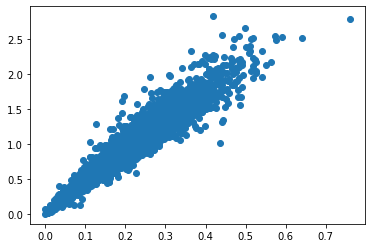

In [15]:
#Let's confirm it
plt.scatter(df['Viscera weight'],df['Whole weight'])
plt.show()
#both are positivly correlated

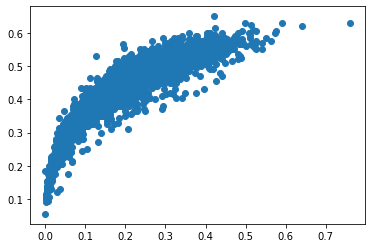

In [16]:
#Let's confirm it
plt.scatter(df['Viscera weight'],df['Diameter'])
plt.show()
#both are positivly correlated

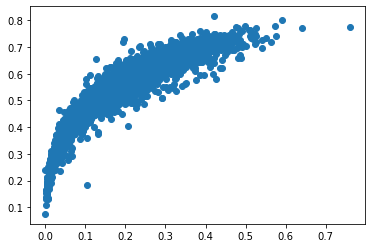

In [17]:
#Let's confirm it
plt.scatter(df['Viscera weight'],df['Length'])
plt.show()
#both are positivly correlated

### Checking for Outliers

C:\Users\91945\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91945\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91945\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91945\Anaconda3\lib\si

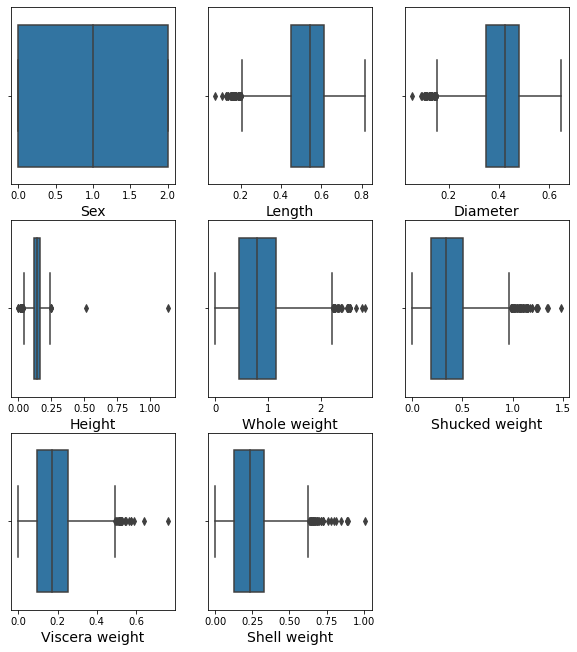

In [18]:
#plotting outliers using boxplot
df_features=df.drop(columns=['Rings'])
plt.figure(figsize=(10,15),facecolor='white')#checking data distribution 
plotnumber=1
for column in df_features:
    if plotnumber<=8:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df_features[column],orient='V')
        plt.xlabel(column,fontsize=14)
    plotnumber+=1  
plt.show()

### Observations
there are outliers in each feature and 'Sex' is categorical feature.

more outliers in shell weight,shucked weight,viscera weight and whole weight.

### Visualise for normal distribution and check for skewness

In [19]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

#### As we are taking threshhold +-.65
Height,Rings have skewness

all other columns seem to be approx normally distributed


C:\Users\91945\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91945\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91945\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

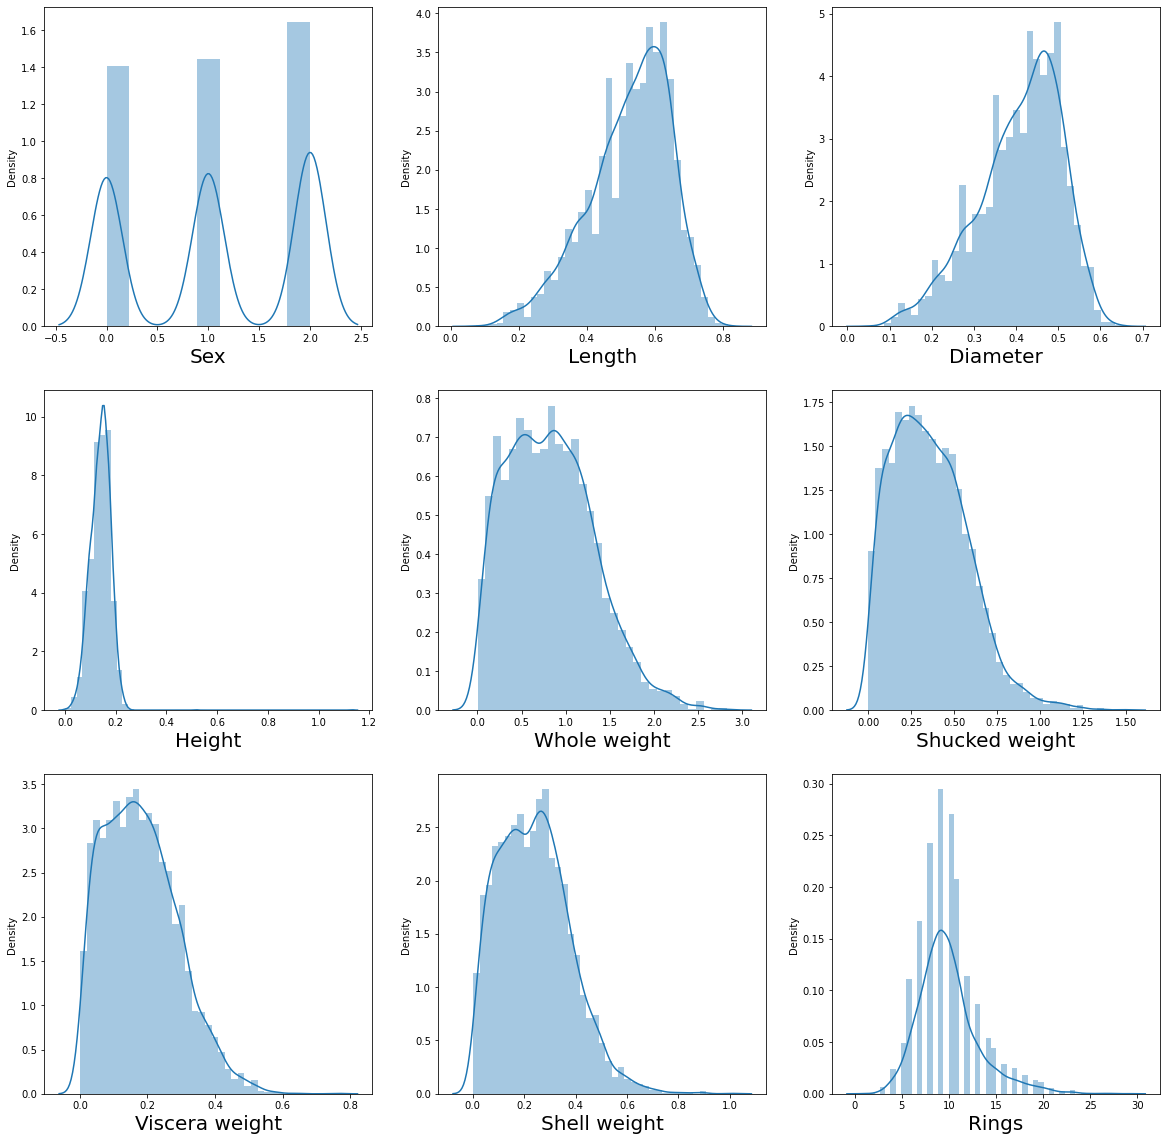

In [20]:
plt.figure(figsize=(20,20),facecolor='white')#checking data distribution 
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1  
plt.show()

### All features have approx normal distribution let's remove outliers with z score and normalize data using standard scaler and check distribution again

In [21]:
from scipy.stats import zscore
z = np.abs(zscore(df))
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [22]:
df_new = df[(z<3).all(axis = 1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [23]:
X=df_new.drop(columns=['Rings'],axis=1)
y=df_new['Rings']

Since, our a lot of features are correlated with each , they have outliers too and distribution is not normal...

i'd like to go for a trade off with selectpercentile feature selection with 80% best features.

In [24]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [25]:
spercentile=SelectPercentile(score_func=chi2,percentile = 80)
spercentile=spercentile.fit(X,y)
cols=spercentile.get_support(indices=True)
features=X.columns[cols]
df_scores=pd.DataFrame({'Features':X.columns,
             'Chi2_score':spercentile.scores_,
             'pValue':spercentile.pvalues_})
df_scores.sort_values(by='Chi2_score',ascending=False)

,Features,Chi2_score,pValue
4,Whole weight,446.102039,7.591987e-85
5,Shucked weight,173.368651,1.789497e-28
7,Shell weight,138.748458,1.266340e-21
6,Viscera weight,99.398845,4.489441e-14
1,Length,55.399175,3.057205e-06
2,Diameter,49.748871,2.513495e-05
3,Height,20.321365,2.060940e-01
0,Sex,8.145299,9.444225e-01


In [26]:
#selecting best 6 featuress
df1=df_new.drop(columns=['Sex','Height'],axis=1)

### Now let's remove skewness using yeo-johnson method

In [27]:
X=df1.drop(columns=['Rings'],axis=1)
y=df1['Rings']

In [28]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')
X

array([[-0.68445079, -0.54337947, -0.57513463, -0.54086524, -0.68803217,
        -0.58635376],
       [-1.4117394 , -1.40113174, -1.35404959, -1.31131805, -1.33285416,
        -1.33271691],
       [-0.0462191 ,  0.03716259, -0.18449788, -0.36270513, -0.24037305,
        -0.08021413],
       ...,
       [ 0.65112915,  0.70592133,  0.85343427,  0.90189694,  1.08965131,
         0.66363183],
       [ 0.92606411,  0.8377131 ,  0.69738476,  0.92415296,  0.87642835,
         0.57752029],
       [ 1.9719402 ,  1.85550496,  2.14577532,  2.31446634,  1.73214622,
         1.85675543]])

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[-0.68445079, -0.54337947, -0.57513463, -0.54086524, -0.68803217,
        -0.58635376],
       [-1.4117394 , -1.40113174, -1.35404959, -1.31131805, -1.33285416,
        -1.33271691],
       [-0.0462191 ,  0.03716259, -0.18449788, -0.36270513, -0.24037305,
        -0.08021413],
       ...,
       [ 0.65112915,  0.70592133,  0.85343427,  0.90189694,  1.08965131,
         0.66363183],
       [ 0.92606411,  0.8377131 ,  0.69738476,  0.92415296,  0.87642835,
         0.57752029],
       [ 1.9719402 ,  1.85550496,  2.14577532,  2.31446634,  1.73214622,
         1.85675543]])

C:\Users\91945\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91945\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91945\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

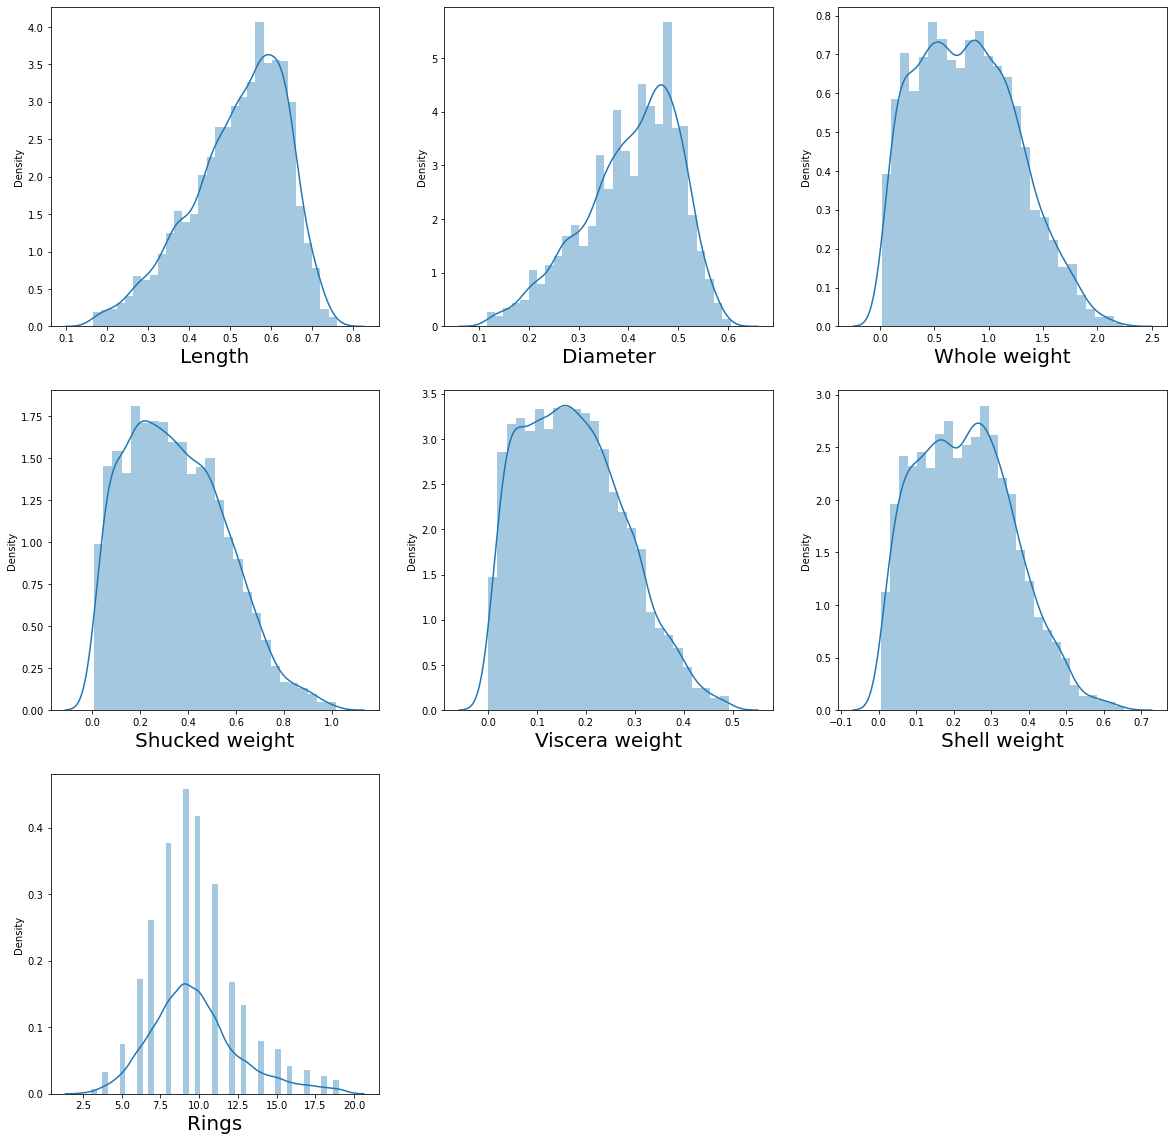

In [30]:
plt.figure(figsize=(20,20),facecolor='white')#checking data distribution again
plotnumber=1
for column in df1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1  
plt.show()

### Now, distribution looks normal for every column 
let's divide the dataset to apply models

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=343)

### Linear_Regression

In [32]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred=lr.predict(X_test)

In [34]:
print(mean_absolute_error(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))

print(np.sqrt(mean_squared_error(y_test,y_pred)))

1.5574757684727698
4.303583692446108
2.074508060347346


In [35]:
#adjusted r2_score train _data
print("Train_score:",lr.score(X_train,y_train))
#r2_score for test _data
print("Test_score:",lr.score(X_test,y_test))
#Model is neither overfit nor underfit

Train_score: 0.5076652913741722
Test_score: 0.49289305268962824


### Let's print cross validation score

In [36]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(lr, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
np.sqrt(np.mean(np.absolute(scores)))

2.0217739989790955

### RandomForestRegressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",rf.score(X_train,y_train))
print("test_score:",rf.score(X_test,y_test))
#Model is overfit

Mean_squared_error: 2.0535473703772498
train_score: 0.9331920247874675
test_score: 0.5030888314209727


In [38]:
#printing Cross-Validation Score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(rf, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))
                      

Mean_squared_error: 1.9754729446542474


### SupportVectorRegressor

In [39]:
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf')
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",rf.score(X_train,y_train))
print("test_score:",rf.score(X_test,y_test))
#Model is overfit

Mean_squared_error: 2.0180631745778865
train_score: 0.9331920247874675
test_score: 0.5030888314209727


In [40]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(reg, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

Mean_squared_error: 1.9573390445975907


### KneighborsRegressor

In [41]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=8)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 2.045052553207942
train_score: 0.6178495923600307
test_score: 0.5071914285424614


In [42]:
#printing cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(model, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

Mean_squared_error: 2.0198771653764958


### Bagging Regressor

In [43]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, y_train)
y_pred=bag_regressor.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 2.1461982276049842
train_score: 0.6178495923600307
test_score: 0.5071914285424614


In [44]:
#printing cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(bag_regressor, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

Mean_squared_error: 2.0585095639510866


### Ada Boost Regressor

In [45]:
from sklearn.ensemble import AdaBoostRegressor
model_ABR = AdaBoostRegressor()
model_ABR.fit(X_train, y_train)
y_pred=model_ABR.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 2.361059626655366
train_score: 0.6178495923600307
test_score: 0.5071914285424614


In [46]:
#printing cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(model_ABR, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

Mean_squared_error: 2.2517588883123247


### Support vector regressor and random forest regressor are giving minimum RMSEso, let's tune Hyperparameter

In [47]:
#tuning Random_forest_model
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [68]:
from sklearn.model_selection import GridSearchCV
 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 10, num = 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the parameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [20, 62, 104, 146, 188, 231, 273, 315, 357, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [71]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv =3, n_jobs = -1, verbose = 2)

In [72]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 146}

In [74]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=146)

In [75]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(bootstrap= True,
 max_depth= 10,
 max_features= 'sqrt',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 146)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score_train=rf.score(X_train,y_train)
score_test=rf.score(X_test,y_test)
print(score_test)
print(score_train)


0.5061803556173023
0.9326064007338529


In [76]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.519304865938431
Mean Squared Error: 4.190820456802383
Root Mean Squared Error: 2.0471493489245924


In [77]:
#saving the model in local system
import pickle
filename='finalized_abalone.pickle'
pickle.dump(rf,open(filename,'wb'))

### Model is still overfitting , so best fit model with least RMSE is Knn

In [55]:
#tuning K_neighbors model
print('Parameters currently in use:\n')
print(model.get_params())

Parameters currently in use:

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}


In [61]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors=K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.698890867853666
RMSE value for k=  2 is: 2.3438313044487655
RMSE value for k=  3 is: 2.220047484912037
RMSE value for k=  4 is: 2.121408115673943
RMSE value for k=  5 is: 2.0727963256783766
RMSE value for k=  6 is: 2.0718834649549005
RMSE value for k=  7 is: 2.0637450995714337
RMSE value for k=  8 is: 2.045052553207942
RMSE value for k=  9 is: 2.0519238429653175
RMSE value for k=  10 is: 2.0432002664200852
RMSE value for k=  11 is: 2.0432631475897787
RMSE value for k=  12 is: 2.035905018999267
RMSE value for k=  13 is: 2.032906806195431
RMSE value for k=  14 is: 2.035290204786675
RMSE value for k=  15 is: 2.025662349806391
RMSE value for k=  16 is: 2.020192527658773
RMSE value for k=  17 is: 2.0124414160473374
RMSE value for k=  18 is: 2.0125758578818127
RMSE value for k=  19 is: 2.0181044641563273
RMSE value for k=  20 is: 2.0182533473234043


<AxesSubplot:>

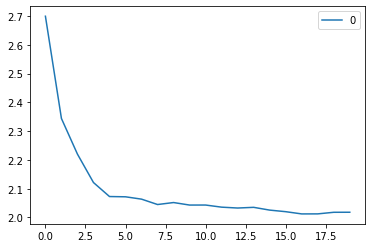

In [62]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [73]:
#safe value for k is 5
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 2.0727963256783766
train_score: 0.6570587110078253
test_score: 0.4937295637065746
